# 日経平均株価

In [3]:
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf

## 日経平均株価の yf.Ticker インスタンスの作成

In [4]:
symbol = '^N225'
ticker = yf.Ticker(symbol)

## 過去６ヶ月の日足データを取得

In [5]:
df = ticker.history(period='6mo')
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-02-09 00:00:00+09:00,36915.441406,37287.261719,36807.031250,36897.421875,146800000,0.0,0.0
2024-02-13 00:00:00+09:00,37248.359375,38010.691406,37184.101562,37963.968750,140500000,0.0,0.0
2024-02-14 00:00:00+09:00,37712.871094,37825.851562,37594.468750,37703.320312,120300000,0.0,0.0
2024-02-15 00:00:00+09:00,38017.828125,38188.738281,37935.359375,38157.941406,130000000,0.0,0.0
2024-02-16 00:00:00+09:00,38517.371094,38865.058594,38361.550781,38487.238281,151700000,0.0,0.0
...,...,...,...,...,...,...,...
2024-08-05 00:00:00+09:00,35249.359375,35301.179688,31156.119141,31458.419922,285600000,0.0,0.0
2024-08-06 00:00:00+09:00,32077.330078,34911.800781,32077.330078,34675.460938,251200000,0.0,0.0
2024-08-07 00:00:00+09:00,34122.351562,35849.769531,33739.460938,35089.621094,242800000,0.0,0.0


### ローソク足チャートと出来高、モメンタム

Reference: https://mekatana.com/python-momentum/

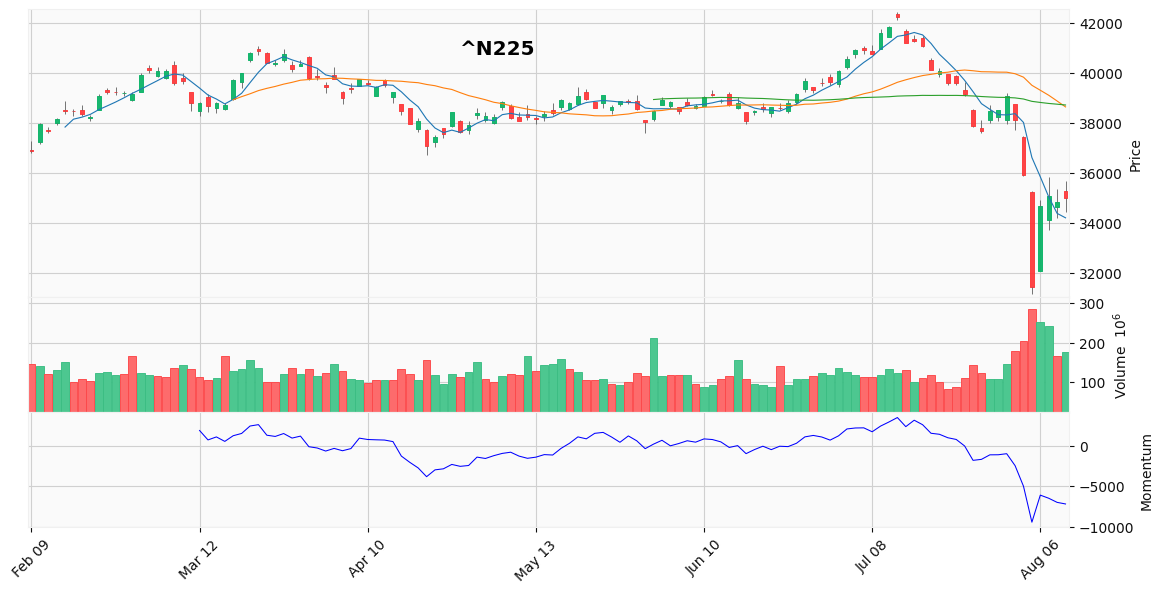

In [25]:
# モメンタムの計算
period = 20
df['momentum'] = df['Close'] - df['Close'].shift(period)

apd_roscillator = [
    mpf.make_addplot(
        df['momentum'],
        ylabel='Momentum',
        color='b',
        width=0.75,
        panel=2,
    )
]

mpf.plot(
    df, type='candle', style='yahoo', mav=(5, 25, 75),
    volume=True,
    addplot=apd_roscillator,
    title=symbol,
    figsize=(12, 6),
    tight_layout=True,
    #savefig=dict(fname='n225_momentum.jpeg', dpi=100)
)

### ローソク足チャートとボリンジャーバンド

Reference: https://mekatana.com/bollinger-bands-python/

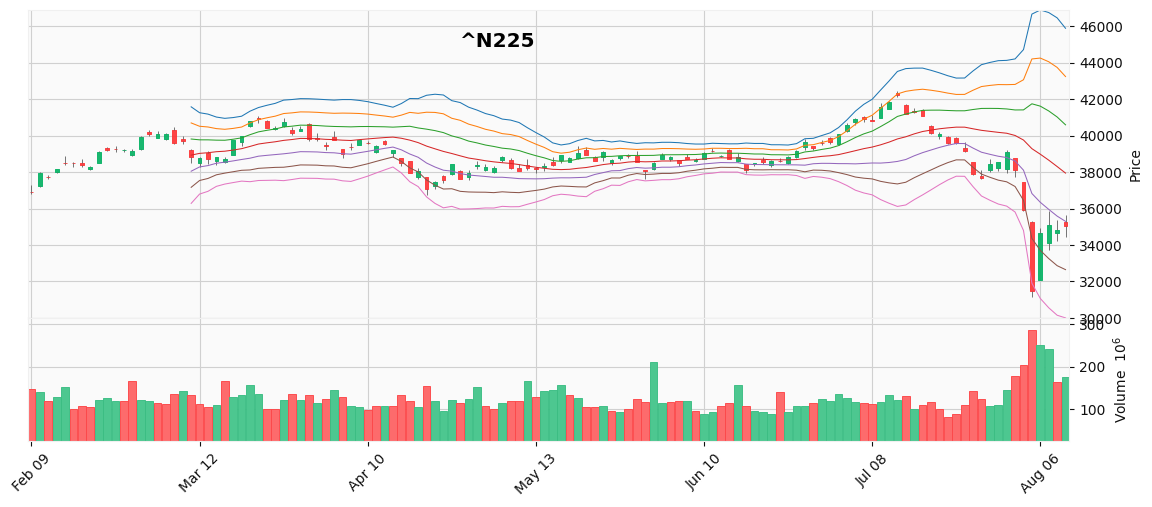

In [23]:
# ボリンジャーバンド
period = 20
r = df['Close'].rolling(period)    
df['upper3'] = r.mean() + 3 * r.std()
df['upper2'] = r.mean() + 2 * r.std()
df['upper1'] = r.mean() + 1 * r.std()
df['mean'] = r.mean()
df['lower1'] = r.mean() - 1 * r.std()
df['lower2'] = r.mean() - 2 * r.std()
df['lower3'] = r.mean() - 3 * r.std()

df_upper3_max=df['upper3'].max() + 10
df_lower3_min=df['lower3'].min() - 10 

apd_oscilator  = [
    mpf.make_addplot(df[['upper3', 'upper2', 'upper1','mean', 'lower1', 'lower2', 'lower3']], width=0.75)
]   

mpf.plot(
    df, type='candle', style='yahoo',
    volume=True,
    title=symbol,
    addplot=apd_oscilator,
    ylim=(df_lower3_min, df_upper3_max),
    figsize=(12, 5),
    tight_layout=True,
    #savefig=dict(fname='n225_bollinger-bands.jpeg', dpi=100)
)